#📌 Extracción

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# URL del archivo JSON en formato raw
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Cargar los datos en un DataFrame
datos_brutos_clientes = pd.read_json(url)

# Mostrar las primeras 5 filas del DataFrame
datos_brutos_clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

## Conociendo los datos

In [24]:
datos_brutos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [25]:
datos_brutos_clientes.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


## Normalizando el JSON

In [26]:
# --- PASO 2: TRANSFORMACIÓN (NORMALIZACIÓN) ---
df_clientes = pd.concat([
    datos_brutos_clientes[['customerID', 'Churn']],
    pd.json_normalize(datos_brutos_clientes['customer']),
    pd.json_normalize(datos_brutos_clientes['phone']),
    pd.json_normalize(datos_brutos_clientes['internet']),
    pd.json_normalize(datos_brutos_clientes['account'])
], axis=1)

print("--- DataFrame Normalizado ---")
df_clientes.info()

--- DataFrame Normalizado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract    

In [27]:
df_clientes.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Comprobación y Manejo de Inconsistencias

Inconsistencia 1: Churn con valores vacíos y tipo object

In [28]:
# --- Limpieza de la columna Churn ---
print("Valores únicos en 'Churn' antes de la limpieza:")
print(df_clientes['Churn'].unique())

# Reemplazar los valores vacíos ('') por 'No', que es la categoría negativa.
df_clientes['Churn'] = df_clientes['Churn'].replace('', 'No')

print("\nValores únicos en 'Churn' después de la limpieza:")
print(df_clientes['Churn'].unique())

Valores únicos en 'Churn' antes de la limpieza:
['No' 'Yes' '']

Valores únicos en 'Churn' después de la limpieza:
['No' 'Yes']


Inconsistencia 2: Charges.Total con espacios y tipo object

In [29]:
# --- Limpieza de la columna Charges.Total ---
# Primero, buscamos dónde están los problemas.
# Los clientes con 'tenure' igual a 0 tienen 'Charges.Total' como un espacio ' '.
# Vamos a convertir esos espacios en 0, ya que no han tenido cargos totales todavía.

# Usamos pd.to_numeric con errors='coerce'. Esto es clave.
# Convierte los valores numéricos a float y los que no puede (como ' '), los convierte en NaN (Not a Number).
df_clientes['Charges.Total'] = pd.to_numeric(df_clientes['Charges.Total'], errors='coerce')

# Ahora, usamos fillna(0) para reemplazar esos NaN por 0.
df_clientes['Charges.Total'].fillna(0, inplace=True)

print(f"\nValores nulos en 'Charges.Total' después de limpiar: {df_clientes['Charges.Total'].isnull().sum()}")
print(f"Tipo de dato de 'Charges.Total' ahora es: {df_clientes['Charges.Total'].dtype}")


Valores nulos en 'Charges.Total' después de limpiar: 0
Tipo de dato de 'Charges.Total' ahora es: float64


/tmp/ipython-input-3671528389.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clientes['Charges.Total'].fillna(0, inplace=True)


In [31]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Estandarización y Ajuste de Tipos de Datos

In [32]:
print("--- Estandarizando columnas binarias ---")

# Creamos el diccionario para el mapeo, como lo haríamos para estandarizar datos.
mapa = {'Yes': 1, 'No': 0}

# Lista de columnas que deberían ser 1 o 0
columnas_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# Primero, unificamos las categorías. Por ejemplo, 'No phone service' es funcionalmente un 'No'.
for col in columnas_binarias:
    df_clientes[col] = df_clientes[col].replace({'No phone service': 'No', 'No internet service': 'No'})

# Ahora aplicamos el mapeo de 'Yes'/'No' a 1/0 y cambiamos el tipo de dato
for col in columnas_binarias:
    df_clientes[col] = df_clientes[col].replace(mapa)
    df_clientes[col] = df_clientes[col].astype('int64')


# También convertimos la columna 'gender' a numérica
df_clientes['gender'] = df_clientes['gender'].replace({'Female': 0, 'Male': 1}).astype('int64')

# Verifiquemos el resultado final con .info()
print("\n--- Información del DataFrame después de la estandarización ---")
df_clientes.info()

--- Estandarizando columnas binarias ---

--- Información del DataFrame después de la estandarización ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-nul

/tmp/ipython-input-2314917359.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clientes[col] = df_clientes[col].replace(mapa)
/tmp/ipython-input-2314917359.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clientes[col] = df_clientes[col].replace(mapa)
/tmp/ipython-input-2314917359.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opt

## Creación de la Columna Cuentas_Diarias

In [33]:
df_clientes['Cuentas_Diarias'] = df_clientes['Charges.Monthly'] / 30

print("\n--- Muestra final con la nueva columna Cuentas_Diarias ---")
df_clientes[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head()


--- Muestra final con la nueva columna Cuentas_Diarias ---


,customerID,Charges.Monthly,Cuentas_Diarias
0,0002-ORFBO,65.6,2.186667
1,0003-MKNFE,59.9,1.996667
2,0004-TLHLJ,73.9,2.463333
3,0011-IGKFF,98.0,3.266667
4,0013-EXCHZ,83.9,2.796667


In [36]:
df_clientes.to_json('df_clientes_limpio.json')

In [37]:
pd.read_json('df_clientes_limpio.json')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,0,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,1,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,1,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,1,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


#📊 Carga y análisis

## Análisis Descriptivo

In [38]:
# La función describe() nos da un resumen estadístico de todas las columnas numéricas.
print("--- Análisis Descriptivo del DataFrame ---")
df_clientes.describe()

--- Análisis Descriptivo del DataFrame ---


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.505711,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


## Distribución de Evasión (Churn)

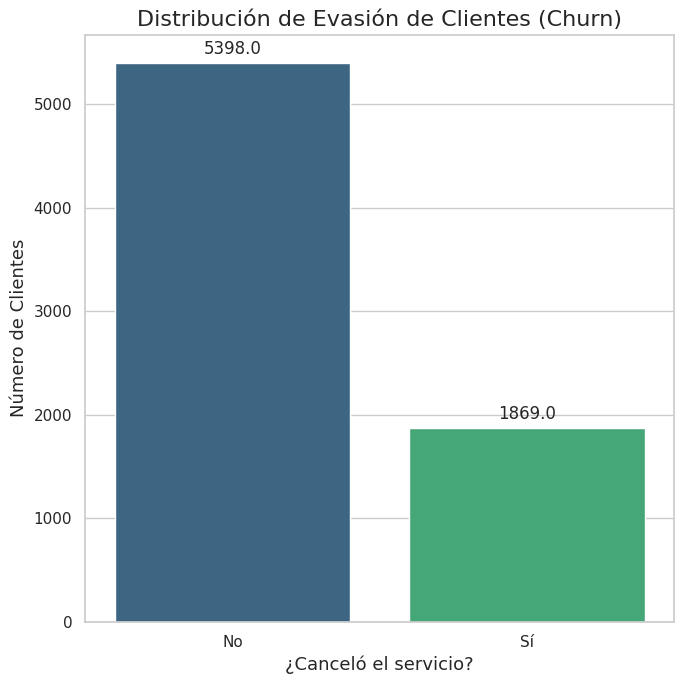

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Creamos la figura y los ejes
fig, ax = plt.subplots(figsize=(7, 7))

# Creamos el gráfico de conteo
sns.countplot(x='Churn', data=df_clientes, palette='viridis', hue='Churn', legend=False, ax=ax)
# Iteramos sobre cada barra en el gráfico (ax.patches)
for patch in ax.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    ax.text(x=x, y=height + 50, s=f'{height}', ha='center', va='bottom', fontsize=12)

# Añadimos títulos y etiquetas
ax.set_title('Distribución de Evasión de Clientes (Churn)', fontsize=16)
ax.set_xlabel('¿Canceló el servicio?', fontsize=13)
ax.set_ylabel('Número de Clientes', fontsize=13)

# Cambiamos las etiquetas del eje x para que sean más claras (0 -> No, 1 -> Sí)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Sí'])

# Hacemos que el gráfico se muestre de forma ajustada
plt.tight_layout()
plt.show()

## Recuento de Evasión por Variables Categóricas

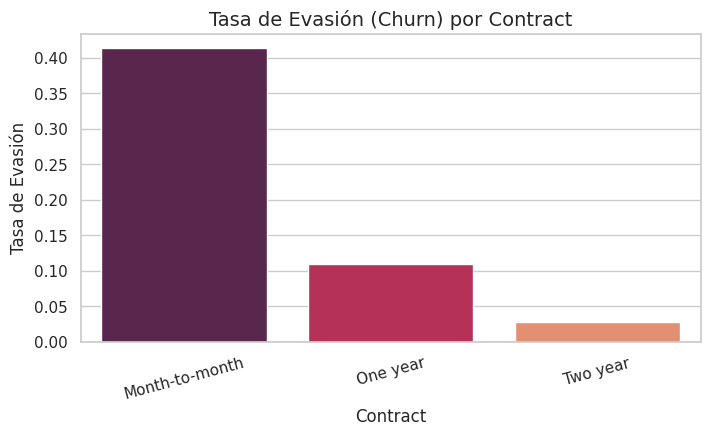

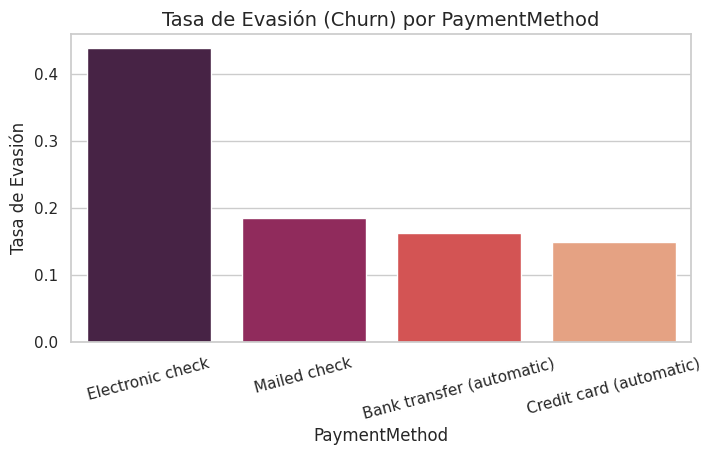

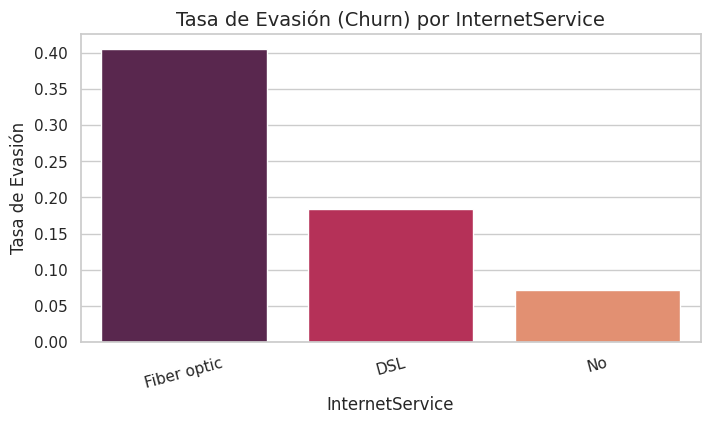

In [51]:
# Seleccionamos las columnas categóricas más relevantes
columnas_categoricas = ['Contract', 'PaymentMethod', 'InternetService']

# Creamos un gráfico para cada variable categórica
for columna in columnas_categoricas:
    # Agrupamos por la categoría y calculamos la media de 'Churn'
    churn_rate = df_clientes.groupby(columna)['Churn'].mean().sort_values(ascending=False)

    plt.figure(figsize=(8, 4))

    ax = sns.barplot(
        x=churn_rate.index,
        y=churn_rate.values,
        palette='rocket',
        hue=churn_rate.index,
        legend=False
    )

    ax.set_title(f'Tasa de Evasión (Churn) por {columna}', fontsize=14)
    ax.set_xlabel(columna, fontsize=12)
    ax.set_ylabel('Tasa de Evasión', fontsize=12)
    plt.xticks(rotation=15)
    plt.show()

## Conteo de Evasión por Variables Numéricas

In [54]:
import plotly.express as px

# Seleccionamos las columnas numéricas relevantes
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Creamos un histograma interactivo para cada variable numérica
for columna in columnas_numericas:
    # Creamos la figura con px.histogram
    # 'x' es la variable numérica que queremos analizar
    # 'color' es la variable por la que queremos separar los datos ('Churn')
    fig = px.histogram(df_clientes,
                       x=columna,
                       color='Churn',
                       title=f'Distribución de {columna} por Evasión (Churn)',
                       labels={'Churn': '¿Canceló el servicio?'},
                       barmode='overlay'
                      )

    # Actualizamos las etiquetas del color para que sean más claras
    new_names = {'0': 'No', '1': 'Sí'}
    fig.for_each_trace(lambda t: t.update(name = new_names[t.name]))

    # Mostramos el gráfico interactivo
    fig.show()

## Adicional: Análisis de correlación entre variables

Crear la Columna "NumServices"

In [55]:
# --- CREACIÓN DE LA COLUMNA DE NÚMERO DE SERVICIOS ---

# Lista de todas las columnas que representan un servicio contratado
columnas_servicios = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# También creamos una columna para saber si tienen servicio de internet
# ya que 'InternetService' es categórica
df_clientes['HasInternet'] = df_clientes['InternetService'].apply(lambda x: 0 if x == 'No' else 1)

# Agregamos la nueva columna a nuestra lista de servicios
columnas_servicios.append('HasInternet')

# Creamos la columna 'NumServices' sumando todos los servicios
df_clientes['NumServices'] = df_clientes[columnas_servicios].sum(axis=1)

print("--- Muestra de la nueva columna 'NumServices' ---")
df_clientes[['customerID', 'NumServices']].head()

--- Muestra de la nueva columna 'NumServices' ---


,customerID,NumServices
0,0002-ORFBO,5
1,0003-MKNFE,4
2,0004-TLHLJ,3
3,0011-IGKFF,6
4,0013-EXCHZ,4


Calcular y Visualizar la Correlación

--- Correlación de variables con Churn ---
Churn               1.000000
HasInternet         0.224051
Cuentas_Diarias     0.189866
Charges.Monthly     0.189866
PaperlessBilling    0.186666
SeniorCitizen       0.146733
StreamingTV         0.062430
StreamingMovies     0.060586
MultipleLines       0.039343
PhoneService        0.012571
gender             -0.009555
NumServices        -0.017673
DeviceProtection   -0.063452
OnlineBackup       -0.080163
Partner            -0.148546
TechSupport        -0.160440
Dependents         -0.161384
OnlineSecurity     -0.166828
Charges.Total      -0.193345
tenure             -0.344079
Name: Churn, dtype: float64


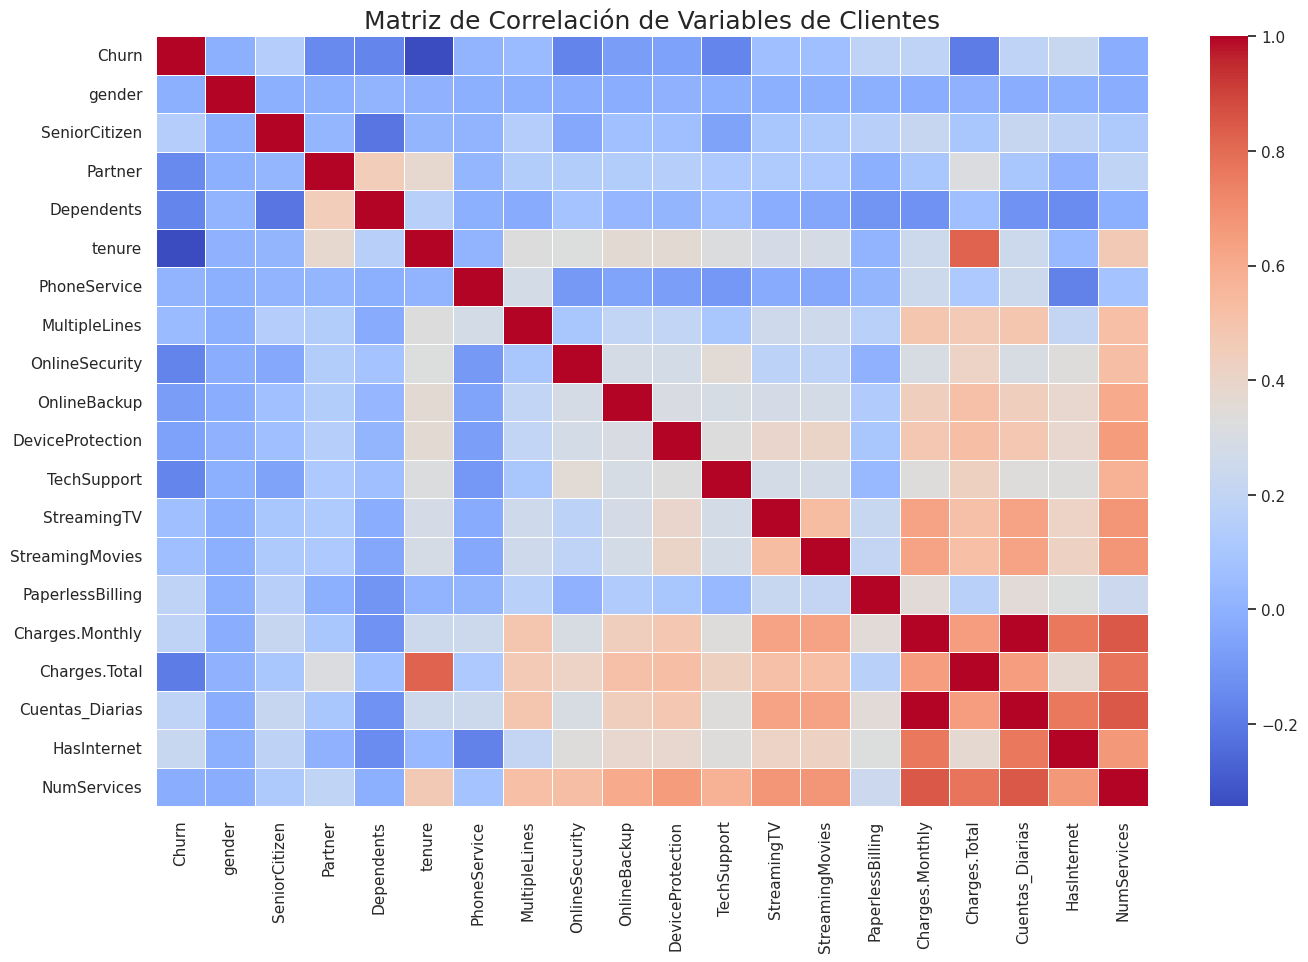

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- ANÁLISIS DE CORRELACIÓN ---

# Seleccionamos solo las columnas numéricas para el cálculo de correlación
df_numerico = df_clientes.select_dtypes(include=np.number)

# Calculamos la matriz de correlación
correlaciones = df_numerico.corr()

# Para ver rápidamente las correlaciones más fuertes con Churn
print("--- Correlación de variables con Churn ---")
print(correlaciones['Churn'].sort_values(ascending=False))

# Creamos la figura para el heatmap
plt.figure(figsize=(16, 10))

# Usamos sns.heatmap para visualizar la matriz
ax = sns.heatmap(
    correlaciones,
    annot=False,
    cmap='coolwarm',
    linewidths=.5
)

ax.set_title('Matriz de Correlación de Variables de Clientes', fontsize=18)
plt.show()

#📄Informe final

### **Informe Final: Análisis de Evasión de Clientes (Churn) para Telecom X**

**Analista:** *Jimena Castro*

### 1. Introducción

El presente informe detalla el análisis exploratorio de datos (EDA) realizado sobre el conjunto de datos de clientes de Telecom X. El objetivo principal de este proyecto es identificar los factores y características clave que distinguen a los clientes que cancelan su servicio (churn) de aquellos que permanecen en la compañía.

Telecom X enfrenta una significativa tasa de evasión de clientes. Este análisis busca proveer una comprensión profunda de las posibles causas, sirviendo como base fundamental para que el equipo de Ciencia de Datos pueda construir modelos predictivos precisos y para que la empresa desarrolle estrategias de retención efectivas.

### 2. Limpieza y Tratamiento de Datos (ETL)

Para asegurar la calidad y fiabilidad del análisis, se llevó a cabo un riguroso proceso de Extracción, Transformación y Carga (ETL):

*   **Extracción:** Los datos fueron extraídos directamente desde la API proporcionada, la cual entregó la información en un formato JSON anidado.
*   **Transformación:**
    1.  **Normalización de Datos:** La estructura JSON anidada fue aplanada utilizando la función `pandas.json_normalize`. Esto permitió convertir una estructura compleja en un DataFrame tabular con 21 columnas, facilitando su manipulación.
    2.  **Manejo de Inconsistencias:** Se identificaron y corrigieron valores inconsistentes. La columna `Churn` contenía entradas vacías que fueron correctamente asignadas como 'No'. La columna `Charges.Total` contenía espacios en blanco para clientes nuevos, los cuales fueron convertidos a `0`.
    3.  **Ajuste de Tipos de Datos:** Se corrigieron los tipos de datos para asegurar la consistencia. `Charges.Total` fue convertido de `object` a `float64`. Todas las columnas categóricas con respuestas binarias ('Yes'/'No', 'Male'/'Female') fueron estandarizadas a un formato numérico (`int64`), asignando `1` para la respuesta afirmativa/activa y `0` para la negativa.
    4.  **Ingeniería de Características (Feature Engineering):** Se crearon dos nuevas columnas para enriquecer el análisis:
        *   `Cuentas_Diarias`: Calculada a partir de `Charges.Monthly` para ofrecer una perspectiva de gasto a corto plazo.
        *   `NumServices`: Suma de todos los servicios adicionales contratados por un cliente para medir su nivel de integración con el ecosistema de la empresa.


### 3. Análisis Exploratorio de Datos (EDA)

#### 3.1. Distribución General de la Evasión

El primer hallazgo clave es la magnitud del problema de evasión. El análisis del conjunto de datos revela que de un total de 7,267 clientes, 1,869 han cancelado sus servicios, mientras que 5,398 permanecen activos. Esto representa una tasa de evasión (churn) del 25.7%, lo cual confirma que el problema es significativo y justifica la implementación de estrategias de retención enfocadas.

Gráfico 1: Distribución de Clientes Activos vs. Clientes que Cancelaron

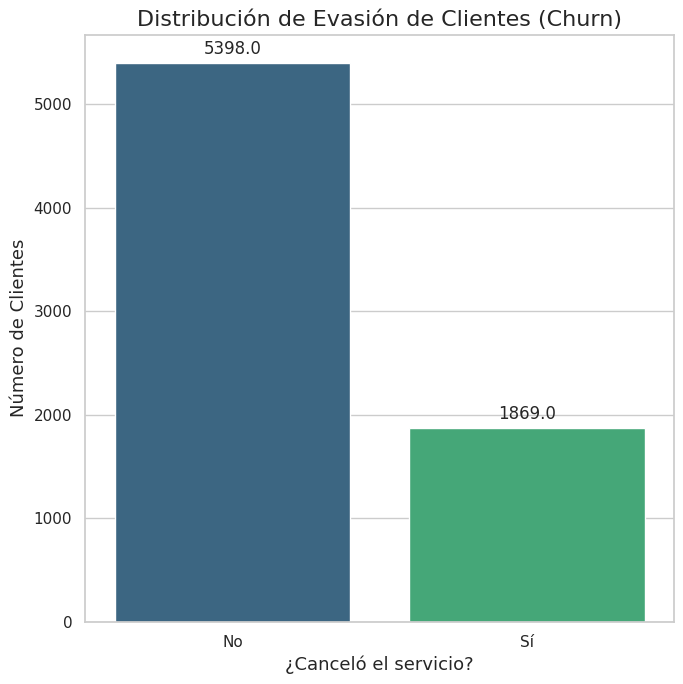



#### 3.2. Evasión por Variables Categóricas Clave

El análisis de la tasa de churn a través de diferentes segmentos de clientes revela patrones muy claros y accionables.

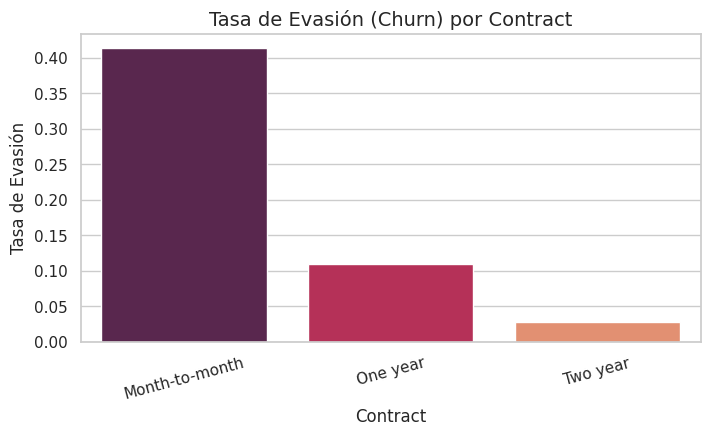

El tipo de contrato es, sin duda, el factor más determinante del churn. Como se observa en el gráfico, la tasa de evasión para clientes con un contrato mes a mes supera el 40%. Esta cifra se desploma a aproximadamente un 11% para contratos de un año y es casi insignificante (menor al 3%) para contratos de dos años. Esto sugiere que la falta de un compromiso a largo plazo es el principal indicador de un cliente en riesgo.

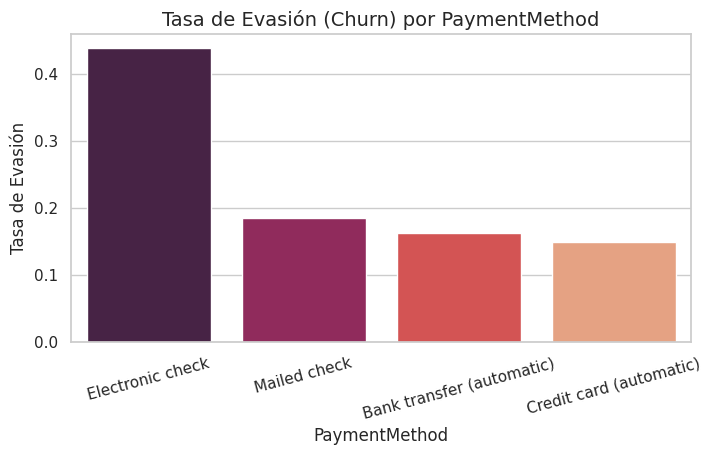

El método de pago también muestra una correlación sorprendente con la evasión. Los clientes que utilizan cheque electrónico (Electronic check) tienen una tasa de churn de casi el 45%, la más alta de todas las categorías. En contraste, los clientes con métodos de pago automáticos (transferencia bancaria o tarjeta de crédito) son los más leales, con tasas de evasión inferiores al 15%. Esto podría indicar fricción o problemas en el proceso de pago con cheque electrónico, o que este método es preferido por un segmento de clientes ya de por sí menos comprometido.

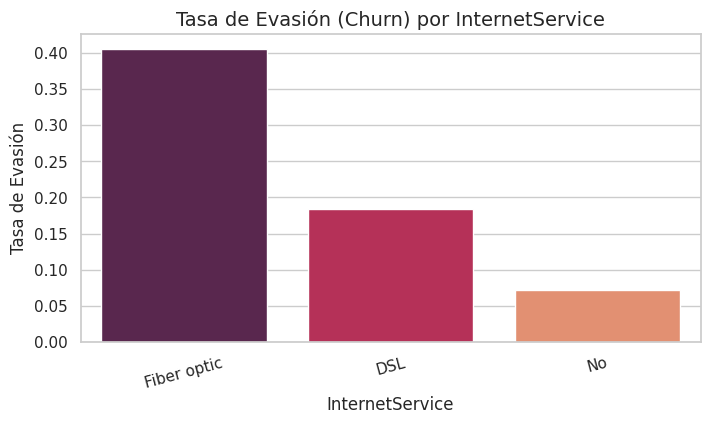

De manera contraintuitiva, los clientes con el servicio premium de Fibra Óptica (Fiber optic) presentan la tasa de churn más alta, superando el 40%. Esto es más del doble de la tasa de los clientes con DSL (aproximadamente 19%). Los clientes sin servicio de internet de Telecom X son los más leales. Este hallazgo sugiere que, aunque la fibra óptica es tecnológicamente superior, podría estar fallando en cumplir las expectativas de los clientes, ya sea por un precio percibido como muy alto, problemas de estabilidad o una fuerte competencia en ese segmento de mercado.


#### 3.3. Evasión por Variables Numéricas

El análisis de las variables numéricas revela comportamientos y perfiles muy distintos entre los clientes que permanecen y los que abandonan el servicio.

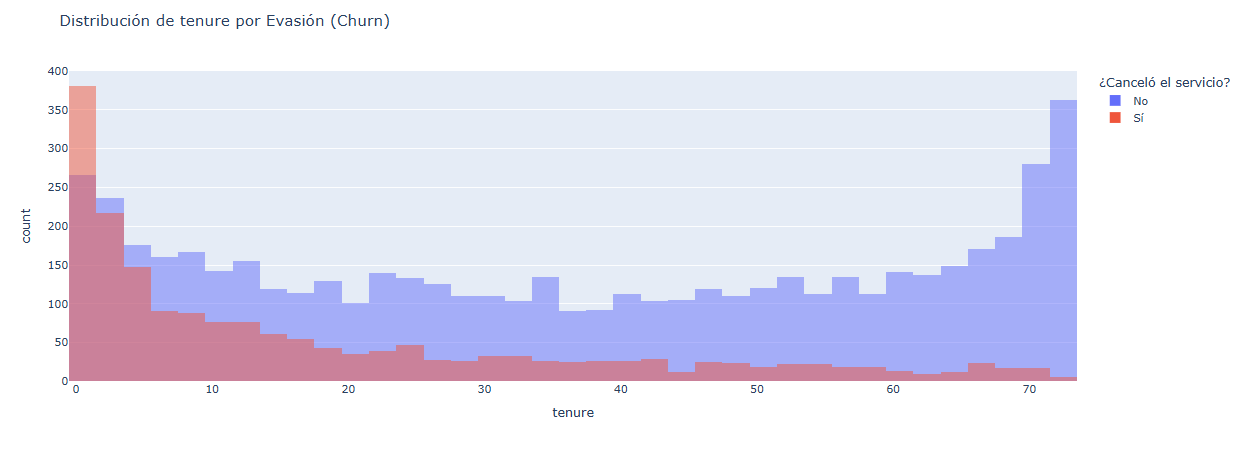

Este gráfico demuestra la distribución de clientes que cancelaron (color rojo) está masivamente concentrada en los valores más bajos de tenure. Se observa un pico muy grande de cancelaciones durante los primeros meses de contrato. Por el contrario, la distribución de clientes leales (color azul) muestra dos grandes picos: uno en los primeros meses (clientes nuevos que deciden quedarse) y otro muy significativo en los valores más altos de tenure (clientes de largo plazo).
Insight: La lealtad del cliente se solidifica con el tiempo. El mayor riesgo de pérdida de un cliente es, por lejos, en su etapa inicial.

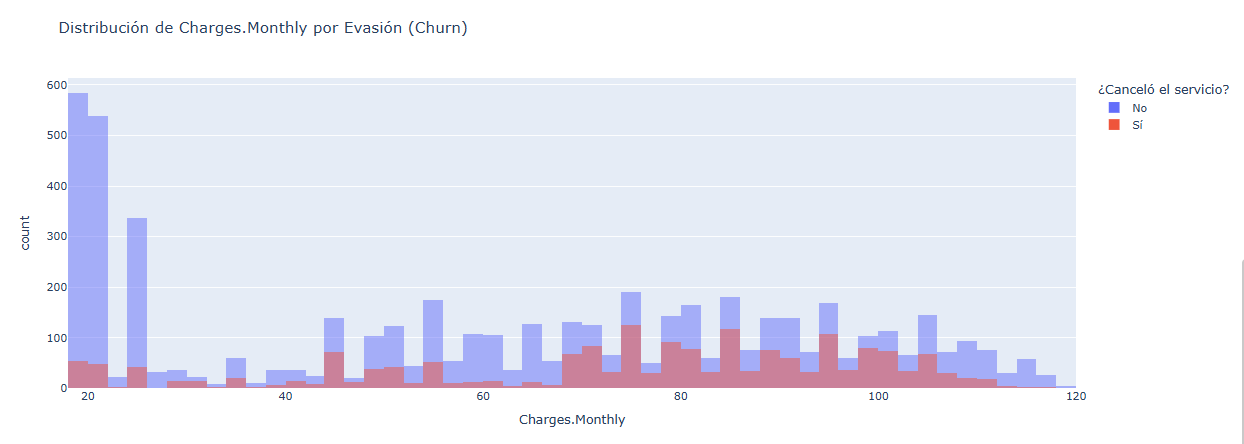

Las distribuciones aquí son muy diferentes. Los clientes que no cancelan (azul) tienen una fuerte concentración en los cargos mensuales más bajos (alrededor de 20 y 25), que probablemente corresponden a planes básicos (ej. solo teléfono). Por otro lado, los clientes que sí cancelan (rojo) están mucho más concentrados en los rangos de precios más altos (entre $70 y $110).
Insight: Un cargo mensual elevado es un factor de riesgo significativo. Los clientes que pagan más son más propensos a evaluar si el costo del servicio justifica el valor recibido, especialmente si tienen fibra óptica, como vimos en el análisis anterior.

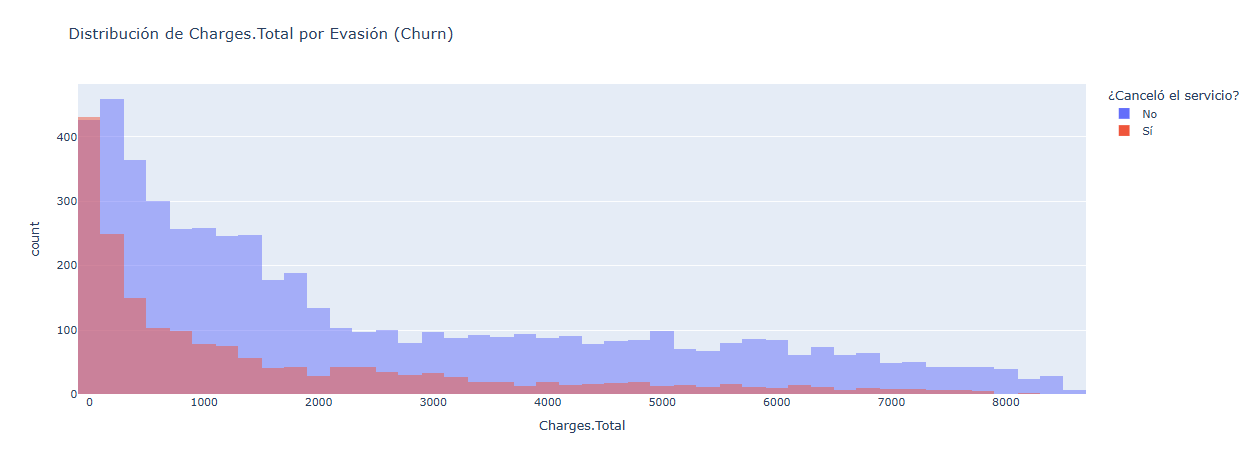

Este gráfico refuerza el hallazgo sobre la antigüedad. La distribución de los cargos totales para los clientes que cancelaron (rojo) está fuertemente sesgada hacia la izquierda, con la gran mayoría habiendo gastado menos de $1000 en total. Esto es una consecuencia directa de su corta permanencia. Los clientes leales (azul) tienen una distribución mucho más extendida, llegando a cargos totales muy superiores.
Insight: El valor total gastado por un cliente que cancela es, en general, muy bajo, lo que indica que la empresa no logra rentabilizar a estos clientes antes de que se vayan.

#### 3.4. Matriz de Correlación

Para cuantificar la relación lineal entre las diferentes variables y la evasión de clientes, se calculó una matriz de correlación. El mapa de calor resultante y el análisis específico sobre la variable Churn revelan los factores más influyentes.

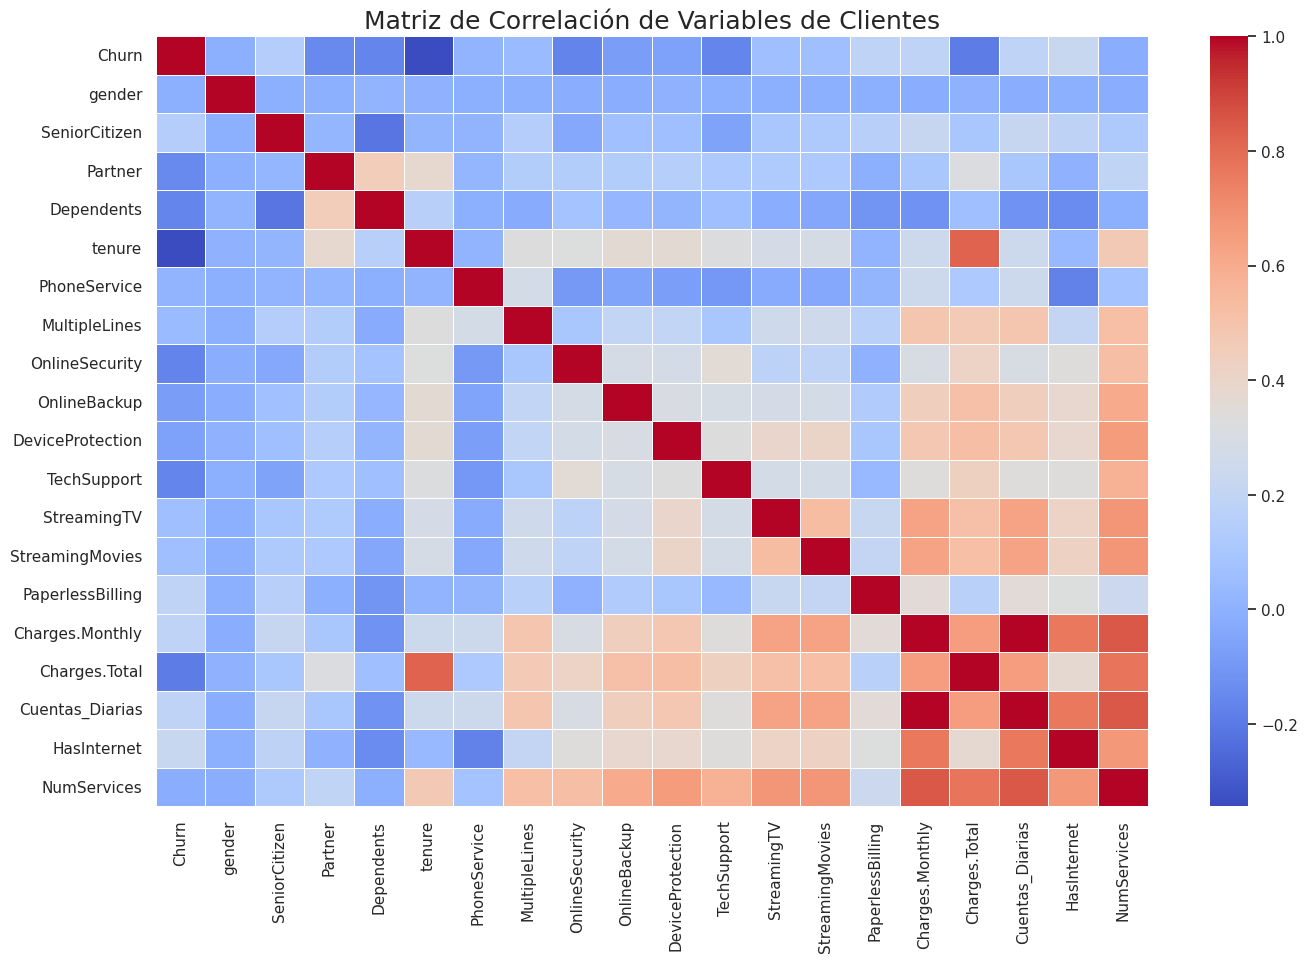

De este análisis, extraemos los siguientes puntos clave:
- Principales Factores de Retención (Correlación Negativa):
    - tenure (-0.34): Confirma ser el factor más fuerte para la retención de clientes. A medida que un cliente pasa más tiempo con la empresa, la probabilidad de que cancele disminuye drásticamente.
    - Charges.Total (-0.19): Esta variable está muy ligada a tenure. Un cargo total alto implica que el cliente ha estado pagando durante mucho tiempo, lo que refuerza su lealtad.
    - Servicios de Soporte y Seguridad (OnlineSecurity, TechSupport): Con correlaciones de -0.17 y -0.16 respectivamente, estos servicios tienen un claro efecto de retención. Los clientes que se sienten seguros y respaldados tienden a permanecer.
    - Relaciones Personales (Partner, Dependents): Tener pareja o dependientes muestra una correlación negativa (-0.15 y -0.16), sugiriendo que los clientes con responsabilidades familiares buscan más estabilidad y son menos propensos a cambiar de proveedor.

- Principales Factores de Riesgo (Correlación Positiva):
    - HasInternet (0.22): Esta correlación positiva indica que los clientes con servicio de internet son, en general, más propensos al churn que los que solo tienen servicio telefónico. Esto probablemente se deba a la mayor competencia en el mercado de internet.
    - Charges.Monthly / Cuentas_Diarias (0.19): Confirma lo visto en el histograma. Un costo mensual más alto aumenta la probabilidad de churn. Los clientes son sensibles al precio.
    - PaperlessBilling (0.19): Una correlación positiva interesante. Los clientes con facturación sin papel son más propensos a cancelar. Esto podría estar relacionado con el método de pago (cheque electrónico, que es digital) o porque este segmento de clientes es más digital y, por lo tanto, más propenso a comparar y cambiar de proveedor en línea.
    - SeniorCitizen (0.15): Los clientes mayores de 65 años muestran una ligera tendencia mayor a cancelar el servicio.

### 4. Conclusiones e Insights Clave

Tras un análisis exhaustivo de los datos, hemos identificado cuatro conclusiones fundamentales que explican la alta tasa de evasión de clientes en Telecom X:

1.  **El Compromiso a Corto Plazo es el Mayor Riesgo:** El factor más determinante del churn es el **tipo de contrato**. Los clientes con planes "mes a mes" tienen una tasa de abandono superior al 40%, mientras que aquellos con contratos de uno o dos años son significativamente más leales. Esto indica que la falta de un compromiso a largo plazo deja a los clientes vulnerables a ofertas de la competencia y a la insatisfacción a corto plazo.

2.  **La Experiencia Inicial del Cliente es Crítica:** La mayoría de las cancelaciones ocurren durante los **primeros meses de servicio**. La variable `tenure` (antigüedad) tiene la correlación negativa más fuerte con el churn (-0.34). Esto significa que si un cliente supera la barrera inicial, su probabilidad de permanecer en la compañía aumenta drásticamente. El proceso de "onboarding" y la primera impresión son decisivos.

3.  **El Alto Costo sin Valor Percibido Impulsa la Evasión:** Los clientes con **cargos mensuales (`Charges.Monthly`) más elevados** son más propensos a cancelar, especialmente aquellos con servicios de **Fibra Óptica**. Esto, combinado con la falta de servicios de valor agregado como `OnlineSecurity` y `TechSupport` (que tienen correlación negativa con el churn), sugiere que los clientes no perciben que el alto precio se justifique sin estos beneficios adicionales de seguridad y soporte.

4.  **Existen Puntos de Fricción en la Experiencia Digital:** El método de pago con **cheque electrónico** y la **facturación sin papel** están asociados con una mayor tasa de churn. Esto podría indicar problemas de usabilidad en la plataforma de pagos o que el perfil de cliente digital es más propenso a comparar y cambiar de proveedor.

### 5. Recomendaciones Estratégicas

Para abordar directamente las causas del churn identificadas, se proponen las siguientes acciones estratégicas:

*   **Recomendación 1: Fomentar el Compromiso a Largo Plazo.**
    *   **Acción:** Implementar una campaña proactiva para incentivar a los clientes con contratos "mes a mes" a migrar a planes anuales. Se puede ofrecer un **descuento permanente** (ej. 10-15%) o **servicios adicionales gratuitos** (ej. `StreamingMovies` por 6 meses) como incentivo para el cambio. El objetivo es asegurar la lealtad del segmento de mayor riesgo.

*   **Recomendación 2: Fortalecer la Experiencia del Cliente Nuevo.**
    *   **Acción:** Crear un **"Programa de Acompañamiento para Nuevos Clientes"** durante los primeros 90 días. Este programa debe incluir una llamada de bienvenida, una revisión de la primera factura para evitar sorpresas, y un seguimiento para asegurar la calidad y el correcto funcionamiento de los servicios instalados.

*   **Recomendación 3: Aumentar el Valor de los Planes Premium.**
    *   **Acción:** **"Blindar" los planes de Fibra Óptica** incluyendo los servicios de `OnlineSecurity` y `TechSupport` por defecto y sin costo adicional. Esto no solo justifica el precio más alto, sino que también introduce "anclas de retención" que han demostrado reducir el churn.

*   **Recomendación 4: Optimizar la Experiencia de Pago y Facturación.**
    *   **Acción:** Realizar una **auditoría de usabilidad** del proceso de pago con cheque electrónico para identificar y eliminar puntos de fricción. Simultáneamente, ofrecer un pequeño **descuento por adhesión a pago automático** (tarjeta de crédito o transferencia bancaria), que son los métodos con las tasas de churn más bajas.